<a href="https://colab.research.google.com/github/noircir/TensorFlow-Examples/blob/master/Ice_cream_sales_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tensorflow 2.0 Examples/Project 2 Ice cream sales depending on temperature/SalesData.csv')

In [99]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [41]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [42]:
df.shape

(500, 2)

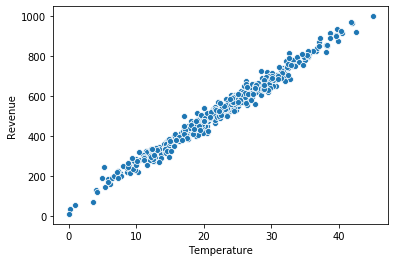

In [43]:
sns.scatterplot(df['Temperature'], df['Revenue'])

In [101]:
X_train = df['Temperature']
y_train = df['Revenue']
print(X_train.shape, y_train.shape)

(500,) (500,)


In [0]:
# create a model with no hidden layers: one input layer X, and one output layer y.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1])) # one weight and one bias

# This is the case of 1 intermediate layer of 10 units: 
#model.add(tf.keras.layers.Dense(units=10, input_shape=[1])) # one weight and one bias
#model.add(tf.keras.layers.Dense(units=1))

In [103]:
# visualize the model : One neuron is connected to 10 neuron weights with 10 biases = 20; 
# then these 10 neurons are connected with 1 output layer with 1 bias = 11
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# specify an optimizer type with a learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [0]:
epochs_history = model.fit(X_train, y_train, epochs=500)

In [106]:
epochs_history.history.keys()

dict_keys(['loss'])

In [107]:
epochs_history.history['loss'][1:10]

[75511.34103125,
 17940.6329296875,
 2321.6261083984373,
 714.9568579101563,
 747.69931640625,
 700.85233203125,
 683.54265234375,
 681.1938681640625,
 680.932908203125]

Text(0, 0.5, 'Training Loss')

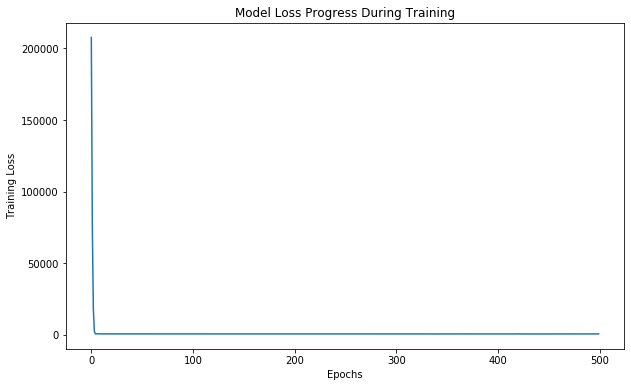

In [108]:
# Very simple NN, no activation function, => not very successful
plt.figure(figsize=(10,6))
plt.plot(epochs_history.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')

plt.ylabel('Training Loss')

In [0]:
# 1st layer: 10 weights, 10 biases
# 2nd layer: 10 weights, 1 bias
(slope, intercept) = model.get_weights()

In [84]:
model.history.params

{'batch_size': 32,
 'do_validation': False,
 'epochs': 1000,
 'metrics': ['loss'],
 'samples': 500,
 'steps': None,
 'verbose': 1}

In [110]:
# use the trained model to perform predictions

Temp = 40
Revenue = model.predict([Temp])
print("Revenue prediction using trained ANN = ", Revenue)

Revenue prediction using trained ANN =  [[913.5998]]


Text(0, 0.5, 'Revenue (dollars)')

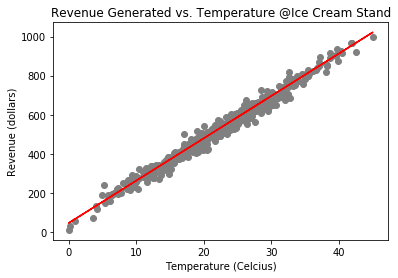

In [111]:
plt.scatter(X_train, y_train, color="gray")
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Revenue (dollars)')

## Compare with scikit-learn Linear Regression

In [0]:
X_train_lr = X_train.values.reshape(-1,1)

In [113]:
X_train_lr.shape

(500, 1)

In [0]:
y_train_lr = y_train.values.reshape(-1,1)

In [115]:
y_train_lr.shape

(500, 1)

In [0]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(fit_intercept=True)  #fit_intercept=True to get slope and intercept

In [117]:
lr_clf.fit(X_train_lr, y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
print('Linear Regression coefficients (slope)', lr_clf.coef_)
print('Linear Regression intercept', lr_clf.intercept_)

Linear Regression coefficients (slope) [[21.44362551]]
Linear Regression intercept [44.83126709]


Text(0, 0.5, 'Revenue (dollars)')

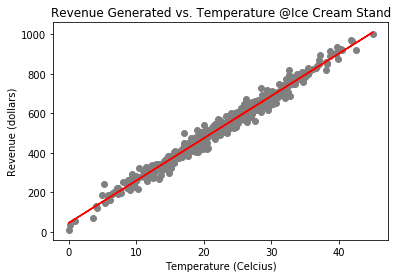

In [120]:
plt.scatter(X_train_lr, y_train_lr, color="gray")
plt.plot(X_train_lr, lr_clf.predict(X_train_lr), color='red')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Revenue (dollars)')

Text(0.5, 1.0, 'Tensorflow result ')

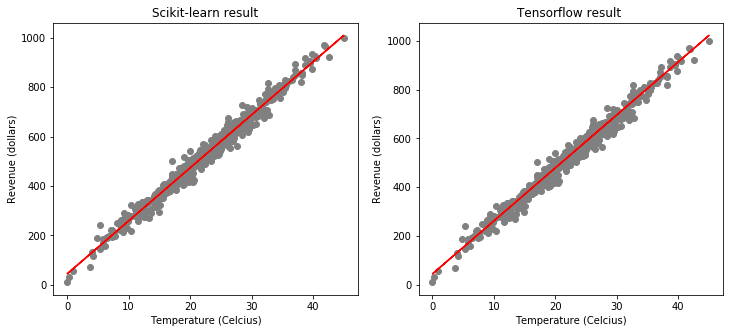

In [134]:
# Side by side: scikit-learn and Tensorflow linear regression

f = plt.figure(figsize=[12,5])
Ax1 = plt.subplot(121)
Ax1.scatter(X_train_lr, y_train_lr, color="gray")
Ax1.plot(X_train_lr, lr_clf.predict(X_train_lr), color='red')
Ax1.set_xlabel('Temperature (Celcius)')
Ax1.set_ylabel('Revenue (dollars)')
Ax1.set_title('Scikit-learn result')
Ax2 = plt.subplot(122)
Ax2.scatter(X_train, y_train, color="gray")
Ax2.plot(X_train, model.predict(X_train), color='red')
Ax2.set_xlabel('Temperature (Celcius)')
Ax2.set_ylabel('Revenue (dollars)')
Ax2.set_title('Tensorflow result ')
# Ax2.legend([slope, intercept])

In [135]:
# set fit_intercept=False, to force the model to go through the origin

lr_clf = LinearRegression(fit_intercept=False)
lr_clf.fit(X_train_lr, y_train_lr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [136]:
print('Linear Regression coefficients (slope)', lr_clf.coef_)
print('Linear Regression intercept', lr_clf.intercept_)

Linear Regression coefficients (slope) [[23.22442357]]
Linear Regression intercept 0.0


Text(0, 0.5, 'Revenue (dollars)')

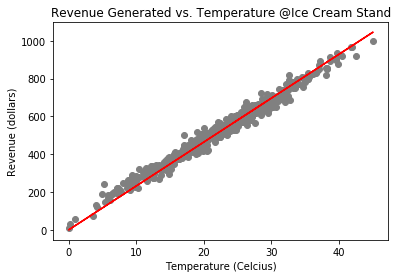

In [137]:
plt.scatter(X_train_lr, y_train_lr, color="gray")
plt.plot(X_train_lr, lr_clf.predict(X_train_lr), color='red')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Revenue (dollars)')